# Synthetic data

In [22]:
from typing import Tuple

import chex
import jax
import jax.numpy as jnp
import numpy as np
import scipy.linalg

import time

def compute_ground_truths(data, sparse=False, subset_by_index=None):
    covariance_matrix = data.T @ data / data.shape[0]
    if sparse:
        covariance_matrix = covariance_matrix.toarray()
    true_eigenvalues, true_eigenvectors = scipy.linalg.eigh(
      covariance_matrix, subset_by_index=subset_by_index
    )

    idxs = np.argsort(true_eigenvalues)[::-1]

    true_eigenvectors = true_eigenvectors[:, idxs].T
    true_eigenvalues = true_eigenvalues[idxs]
    return (
      true_eigenvalues,
      true_eigenvectors,
    )


def generate_data(
    key: chex.PRNGKey,
    dim: int,
    shape
) -> chex.Array:
    random_matrix = jax.random.normal(key, shape=(dim, dim))
    covariance_matrix = np.einsum(
      'dn, dm -> nm',
      random_matrix,
      random_matrix,
    ) / np.sqrt(dim)
    data = jax.random.multivariate_normal(
      key=key,
      mean=jnp.zeros(dim),
      cov=covariance_matrix,
      shape=(shape,),
      method='svd'
    )
    return data


def synthetic_data_experiments(n, dim, seed=0):
    key = jax.random.PRNGKey(seed)
    data = generate_data(key, dim, n)
    start_time = time.time()
    target_eigenvalues, target_eigenvectors = compute_ground_truths(data)
    finish_time = time.time()
    return finish_time - start_time, target_eigenvalues, target_eigenvectors

In [25]:
measured_time, values, vectors = synthetic_data_experiments(n=1000, dim=1000, seed=0)
measured_time

0.39620518684387207

In [ ]:
values

array([ 3.48872528e+02,  3.31940216e+02,  3.29076660e+02,  3.27356598e+02,
        3.19750702e+02,  3.18467651e+02,  3.17215942e+02,  3.14275604e+02,
        3.07982941e+02,  3.05153381e+02,  3.01177246e+02,  2.94768829e+02,
        2.91517090e+02,  2.87832550e+02,  2.84610107e+02,  2.83614014e+02,
        2.82868927e+02,  2.77135315e+02,  2.72283295e+02,  2.68787506e+02,
        2.67762085e+02,  2.64714020e+02,  2.62681427e+02,  2.61903229e+02,
        2.60841034e+02,  2.57551025e+02,  2.55286301e+02,  2.52982635e+02,
        2.51806458e+02,  2.49250961e+02,  2.47562927e+02,  2.45150757e+02,
        2.43848297e+02,  2.42844696e+02,  2.40717255e+02,  2.37438309e+02,
        2.36324127e+02,  2.33342377e+02,  2.30753403e+02,  2.28300293e+02,
        2.28017731e+02,  2.26605469e+02,  2.25308517e+02,  2.21369461e+02,
        2.19763229e+02,  2.18559067e+02,  2.16479645e+02,  2.14985504e+02,
        2.13256989e+02,  2.11030533e+02,  2.10767181e+02,  2.09313553e+02,
        2.08586914e+02,  

In [27]:
import matplotlib.pyplot as plt
from tqdm import tqdm

times = []
dim_range = range(1, 1001, 100)
repeats = 100

for i in tqdm(dim_range):
    sum_time = 0
    for j in range(repeats):
        measured_time, _, _ = synthetic_data_experiments(n=1000, dim=i, seed=0)
        sum_time += measured_time
    sum_time /= repeats
    times.append(sum_time)


100%|██████████| 10/10 [05:15<00:00, 31.57s/it]


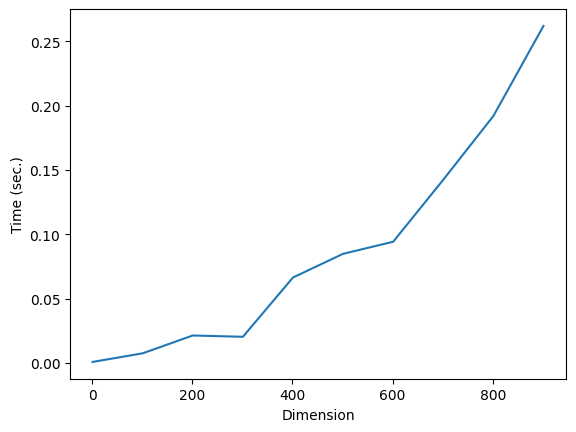

In [29]:
plt.plot(dim_range, times)
plt.xlabel("Dimension")
plt.ylabel("Time (sec.)")
plt.savefig("time.pdf", bbox_inches='tight')

# MNIST

In [30]:
from keras.datasets import mnist

(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))
flattened_train = train_X.reshape(60000, 784)

11490434/11490434 [==============================] - 0s 0us/step
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [31]:
import time

start_time = time.time()
target_eigenvalues, target_eigenvectors = compute_ground_truths(flattened_train)
finish_time = time.time()
print(finish_time - start_time)

224.15138578414917


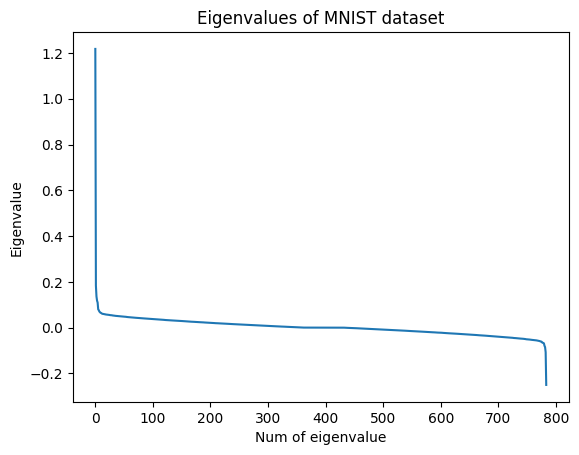

In [33]:
plt.plot(target_eigenvalues)
plt.xlabel("Num of eigenvalue")
plt.ylabel("Eigenvalue")
plt.title("Eigenvalues of MNIST dataset")
plt.savefig("mnist.pdf", bbox_inches='tight')

In [ ]:
target_eigenvalues

array([ 1.21787036e+00,  1.83410311e-01,  1.36128397e-01,  1.17611127e-01,
        1.09463620e-01,  7.96193294e-02,  7.60506843e-02,  7.01890434e-02,
        6.74461290e-02,  6.48550534e-02,  6.40054273e-02,  6.20617055e-02,
        6.03429458e-02,  5.99679190e-02,  5.95795271e-02,  5.91057148e-02,
        5.83472930e-02,  5.81490640e-02,  5.73261352e-02,  5.70553826e-02,
        5.68550793e-02,  5.65300700e-02,  5.59077404e-02,  5.56142753e-02,
        5.53974974e-02,  5.47432362e-02,  5.44236416e-02,  5.42013161e-02,
        5.38828202e-02,  5.37473440e-02,  5.30328515e-02,  5.28655616e-02,
        5.24173460e-02,  5.19236331e-02,  5.17866602e-02,  5.13349564e-02,
        5.10742847e-02,  5.07098516e-02,  5.06875256e-02,  5.02263878e-02,
        5.01061095e-02,  4.95835035e-02,  4.92541318e-02,  4.90465767e-02,
        4.90080243e-02,  4.87887459e-02,  4.83027973e-02,  4.81242648e-02,
        4.80551674e-02,  4.77356508e-02,  4.76542265e-02,  4.74719325e-02,
        4.73119683e-02,  

# Facebook graph

In [ ]:
!wget https://raw.githubusercontent.com/benedekrozemberczki/GEMSEC/master/data/artist_edges.csv
!wget https://raw.githubusercontent.com/benedekrozemberczki/GEMSEC/master/data/athletes_edges.csv
!wget https://raw.githubusercontent.com/benedekrozemberczki/GEMSEC/master/data/company_edges.csv
!wget https://raw.githubusercontent.com/benedekrozemberczki/GEMSEC/master/data/government_edges.csv
!wget https://raw.githubusercontent.com/benedekrozemberczki/GEMSEC/master/data/new_sites_edges.csv
!wget https://raw.githubusercontent.com/benedekrozemberczki/GEMSEC/master/data/politician_edges.csv
!wget https://raw.githubusercontent.com/benedekrozemberczki/GEMSEC/master/data/public_figure_edges.csv
!wget https://raw.githubusercontent.com/benedekrozemberczki/GEMSEC/master/data/tvshow_edges.csv

In [ ]:
import csv
import numpy as np
from scipy.sparse import coo_matrix

edge_cnt = 0
node_cnt = 0
sparse_data = []
sparse_i = []
sparse_j = []

M = 1380293
N = 134833

for filename in [
    'new_sites_edges.csv',
                #  'politician_edges.csv',
                #  'public_figure_edges.csv',
                #  'tvshow_edges.csv',
                #  'artist_edges.csv',
                #  'athletes_edges.csv',
                #  'company_edges.csv',
                #  'government_edges.csv'
                 ]:
    with open(filename, newline='\n') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        header = True
        max_node = 0
        for row in reader:
            if header:
                header = False
            else:
                a, b = row
                a = int(a)
                b = int(b)
                sparse_data.append(1)
                sparse_i.append(edge_cnt)
                sparse_j.append(a + node_cnt)
                sparse_data.append(-1)
                sparse_i.append(edge_cnt)
                sparse_j.append(b + node_cnt)
                edge_cnt += 1
                max_node = max(max_node, max(a + 1, b + 1))
        node_cnt += max_node

matrix = coo_matrix((sparse_data, (sparse_i, sparse_j)))
print(matrix.shape)

(206259, 27917)


In [ ]:
import time

start_time = time.time()
target_eigenvalues, target_eigenvectors = compute_ground_truths(
    matrix, sparse=True, subset_by_index=(0, 7))
finish_time = time.time()
print(finish_time - start_time)

(27917, 27917)
3277.804280757904


In [ ]:
target_eigenvalues

array([4.20924586e-07, 3.36749985e-07, 3.21351990e-07, 2.95150486e-07,
       2.93454187e-07, 2.11551387e-07, 1.34592330e-07, 2.90139192e-19])

In [ ]:
import pickle

with open("output.pickle", "wb") as f:
    pickle.dump(target_eigenvectors, f)